In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format
df = pd.read_csv("job_cleanData.csv") 
df.head()
 

,job_ID,designation,company_id,name,work_type,involvement,employees_count,total_applicants,linkedin_followers,job_details,details_id,industry,level,City,State
0,3471657636,Data Analyst,524.0000,Crossover,Remote,Full-time,1001,200,5395547.0000,About the job Crossover is the world's #1 sour...,2697,IT Services and IT Consulting,Associate,Delhi,Delhi
1,3471669068,Data Analyst,524.0000,Crossover,Remote,Full-time,1001,184,5395547.0000,About the job Crossover is the world's #1 sour...,2724,IT Services and IT Consulting,Associate,New Delhi,Delhi
2,3474349934,Data Analyst,2242.0000,Uplers,Remote,Full-time,1001,200,982115.1912,About the job Profile: ML EngineersExperience:...,3668,IT Services and IT Consulting,Mid-Senior level,Greater Bengaluru Area,Karnataka
3,3472816027,Data Analyst,1553.0000,PVAR SERVICES,On-site,Full-time,1,200,2094.0000,About the job Designation: Data AnalystLocatio...,3083,Not Avilable,Not Avilable,Gurugram,Haryana
4,3473311511,Data Analyst,2147.0000,Timeline Freight Brokers,On-site,Full-time,1,8,982115.1912,About the job The ideal candidate will use the...,3359,Not Avilable,Not Avilable,Mohali district,North West


In [27]:
df.isna().sum()

job_ID                0
designation           0
company_id            0
name                  0
work_type             0
involvement           0
employees_count       0
total_applicants      0
linkedin_followers    0
job_details           0
details_id            0
industry              0
level                 0
City                  0
State                 0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5587 entries, 0 to 5586
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_ID              5587 non-null   int64  
 1   designation         5587 non-null   object 
 2   company_id          5587 non-null   float64
 3   name                5587 non-null   object 
 4   work_type           5587 non-null   object 
 5   involvement         5587 non-null   object 
 6   employees_count     5587 non-null   int64  
 7   total_applicants    5587 non-null   int64  
 8   linkedin_followers  5587 non-null   float64
 9   job_details         5587 non-null   object 
 10  details_id          5587 non-null   int64  
 11  industry            5587 non-null   object 
 12  level               5587 non-null   object 
 13  City                5587 non-null   object 
 14  State               5587 non-null   object 
dtypes: float64(2), int64(4), object(9)
memory usage: 654.9+

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


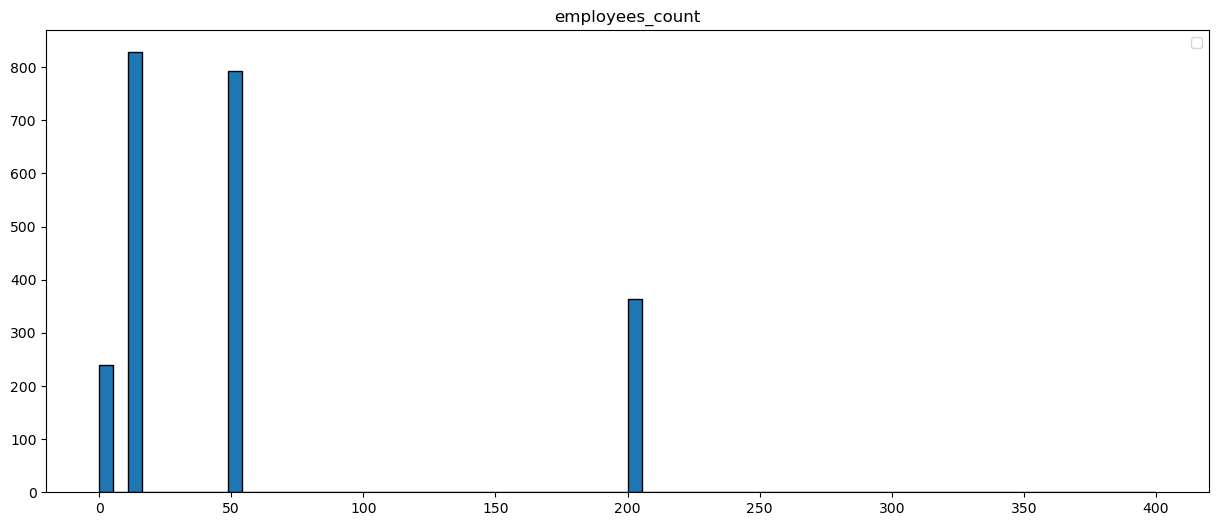

In [33]:
fig, ax = plt.subplots(figsize=( 15,6))
bins_sqrt = int(np.sqrt(len(df['employees_count'])))
ax.hist(df.employees_count , bins=bins_sqrt , edgecolor = 'black' ,range =(0, 400)   )
plt.title('employees_count')

# data = df[['name','total_applicants']].nlargest(20,'total_applicants') .sort_values( by='total_applicants', ascending= True)
# y_pos = np.arange(len(data['name']))
# plt.barh(y= y_pos, width =  data.total_applicants)
# plt.yticks(ticks= y_pos, labels = data['name'] )

# # Add labels and title
# plt.xlabel('Total Applicants')

ax.legend()
plt.show()

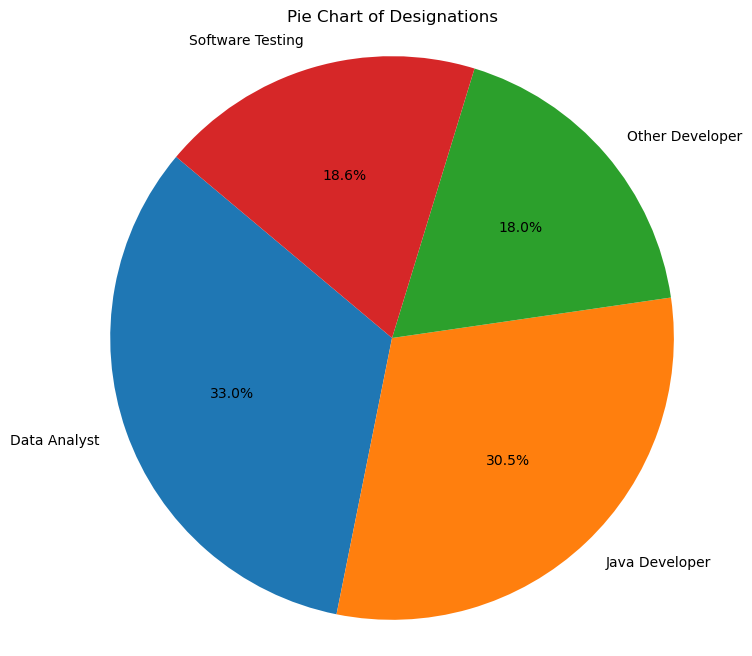

In [43]:
#df = pd.DataFrame(data)

# 按照designation進行分組，計算每個類別的總和
grouped = df.groupby('designation')['designation'].count()

# 計算每個類別的比例
total_count = grouped.sum()
proportions = grouped / total_count

# 設定閾值
threshold = 0.05  # 佔比小於此值的類別將被忽略

# 過濾出佔比大於閾值的類別
proportions_filtered = proportions[proportions >= threshold]

# 繪製Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(proportions_filtered, labels=proportions_filtered.index, autopct='%1.1f%%', startangle=140)
plt.title('Top ')
plt.axis('equal')  # 讓圓形比例更正確
plt.show()

In [2]:
 df.describe()

,job_ID,company_id,employees_count,total_applicants,linkedin_followers,details_id
count,5587.0000,5587.0000,5587.0000,5587.0000,5587.0000,5587.0000
mean,3467219231.8020,1165.6624,2119.5305,24.1418,983431.2427,2954.1584
std,61890886.0310,696.0765,3512.7118,52.7568,2232505.5479,1687.3798
min,141921619.0000,1.0000,1.0000,0.0000,3.0000,1.0000
25%,3467373920.0000,640.0000,51.0000,0.0000,18104.5000,1500.5000
50%,3472552633.0000,957.0000,1001.0000,0.0000,450168.0000,2975.0000
75%,3476289624.5000,1849.5000,1001.0000,16.0000,982115.1912,4422.5000
max,3477823471.0000,2494.0000,10001.0000,200.0000,13136792.0000,5843.0000


In [12]:
 
y = df.total_applicants
X = df.employees_count
X = sm.add_constant(X) # a constant (intercept) term  a
X.head(2)

,const,employees_count
0,1.0,1001
1,1.0,1001


In [13]:
#Linear Regression
# Assuming X is a dataframe or multidimensional array
X_flattened = X.values.flatten()
model1=  sm.OLS(endog = y , exog= X).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:       total_applicants   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     274.9
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           2.66e-60
Time:                        23:07:54   Log-Likelihood:                -29949.
No. Observations:                5587   AIC:                         5.990e+04
Df Residuals:                    5585   BIC:                         5.992e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              17.2473      0.805     

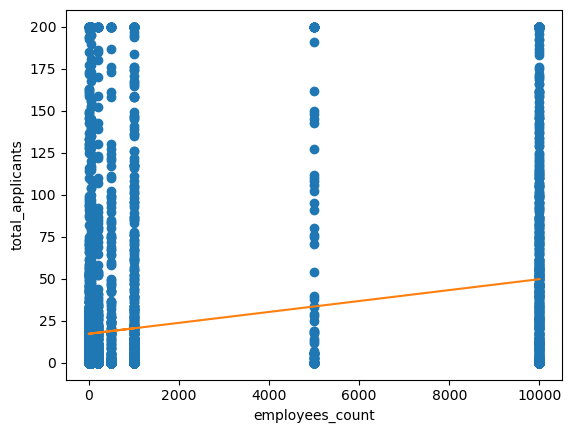

In [14]:
# Assuming X is a dataframe or multidimensional array
#X_values = X.values.flatten()
X= df.employees_count
plt.plot(X , y, 'o')  # blue
b, a = np.polyfit(X , y, 1)
plt.plot(X , b*X  + a)  # y replaced by equation
plt.xlabel("employees_count")
plt.ylabel("total_applicants")
plt.show()

In [7]:
df['work_type'].unique()

array(['Remote', 'On-site', 'Hybrid'], dtype=object)

In [16]:
# Assuming df is already defined

# Define the dependent variable
y = df['employees_count']

# Mapping 'work_type' to numerical values
work_type_mapping = {'Remote': 0, 'On-site': 1, 'Hybrid': 2}

# Create a new column with mapped values
X = df['work_type'].map(work_type_mapping)

# Add a constant (intercept) term to the model
X = sm.add_constant(X.astype(int))  # Ensure X is of integer type after mapping

# Ensure all data in y are numeric
y = pd.to_numeric(y, errors='coerce')

# Drop any rows with missing values in y
y = y.dropna()
X = X.iloc[y.index]  # Align X with the filtered y

# Fit the regression model
try:
    model = sm.OLS(y, X).fit()
    # Print the model summary
    print(model.summary())
except Exception as e:
    print(f"An error occurred: {e}")

                            OLS Regression Results                            
Dep. Variable:        employees_count   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     600.6
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          4.55e-126
Time:                        19:40:57   Log-Likelihood:                -53255.
No. Observations:                5587   AIC:                         1.065e+05
Df Residuals:                    5585   BIC:                         1.065e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        977.4709     64.545     15.144      0.0

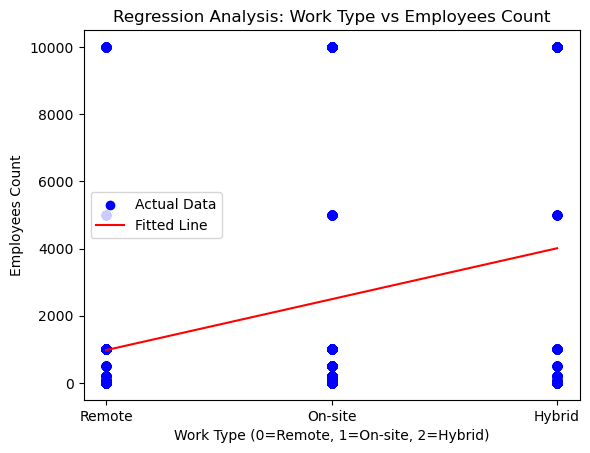

In [22]:
y = df['employees_count']

# Mapping 'work_type' to numerical values
work_type_mapping = {'Remote': 0, 'On-site': 1, 'Hybrid': 2}

# Create a new column with mapped values
X = df['work_type'].map(work_type_mapping)

# Add a constant (intercept) term to the model
X = sm.add_constant(X.astype(int))  # Ensure X is of integer type after mapping

# Ensure all data in y are numeric
y = pd.to_numeric(y, errors='coerce')

# Drop any rows with missing values in y
y = y.dropna()
X = X.loc[y.index]  # Align X with the filtered y

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the predicted values
predicted_values = model.predict(X)

# Plot the scatter plot of the data points
plt.scatter(X.iloc[:, 1], y, color='blue', label='Actual Data')

# Plot the fitted line
plt.plot(X.iloc[:, 1], predicted_values, color='red', label='Fitted Line')

# Add labels and title
plt.xlabel('Work Type (0=Remote, 1=On-site, 2=Hybrid)')
plt.ylabel('Employees Count')
plt.title('Regression Analysis: Work Type vs Employees Count')
plt.legend()
plt.xticks([0, 1, 2], ['Remote', 'On-site', 'Hybrid'])
# Show the plot
plt.show()